# Heart Attack Analysis and Prediction - Binary Classification with Logistic Regression

About dataset

* Age : Age of the patient
* Sex : Sex of the patient
* exang: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3)
* cp : Chest Pain type chest pain type 
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results 
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved
* **target : 0= less chance of heart attack 1= more chance of heart attack**

## Step 1. Data Description

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
cd Heart_Attack_Analysis_and_Prediction

/Users/swsong/Jupyter/Git_Machine_Learning/Machine-Learning-Easy/Heart_Attack_Analysis_and_Prediction


In [9]:
ls

Untitled.ipynb  data/


In [10]:
df = pd.read_csv('./data/heart.csv')

In [11]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
o2 = pd.read_csv('./data/o2Saturation.csv')

In [13]:
o2

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
...,...
3580,98.6
3581,98.6
3582,98.6
3583,98.6


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [20]:
import missingno as msno

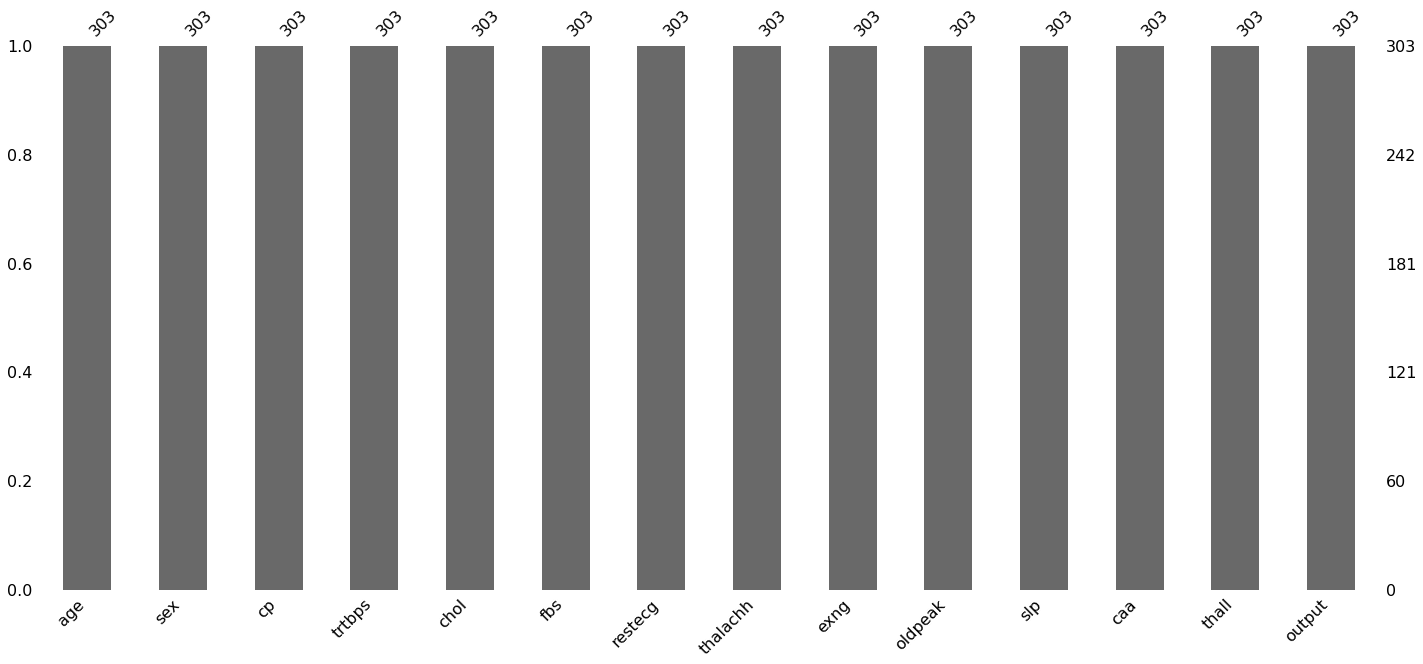

In [22]:
msno.bar(df);

In [25]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [29]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [28]:
df.shape

(303, 14)

------------
1. All Columns are numeric
2. Null value isn't exist
3. colums -> x : 13, y : 1
4. rows -> 14
5. it need to be normalized

In [30]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Step 2. EDA

In [31]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

----------
There are some categorical columns(but int type). Let's EDA that first

In [32]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [33]:
cat_cols = ['sex','cp','fbs','restecg','exng','slp','caa','thall']

In [34]:
len(cat_cols)

8

In [38]:
df['sex'].v

0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64

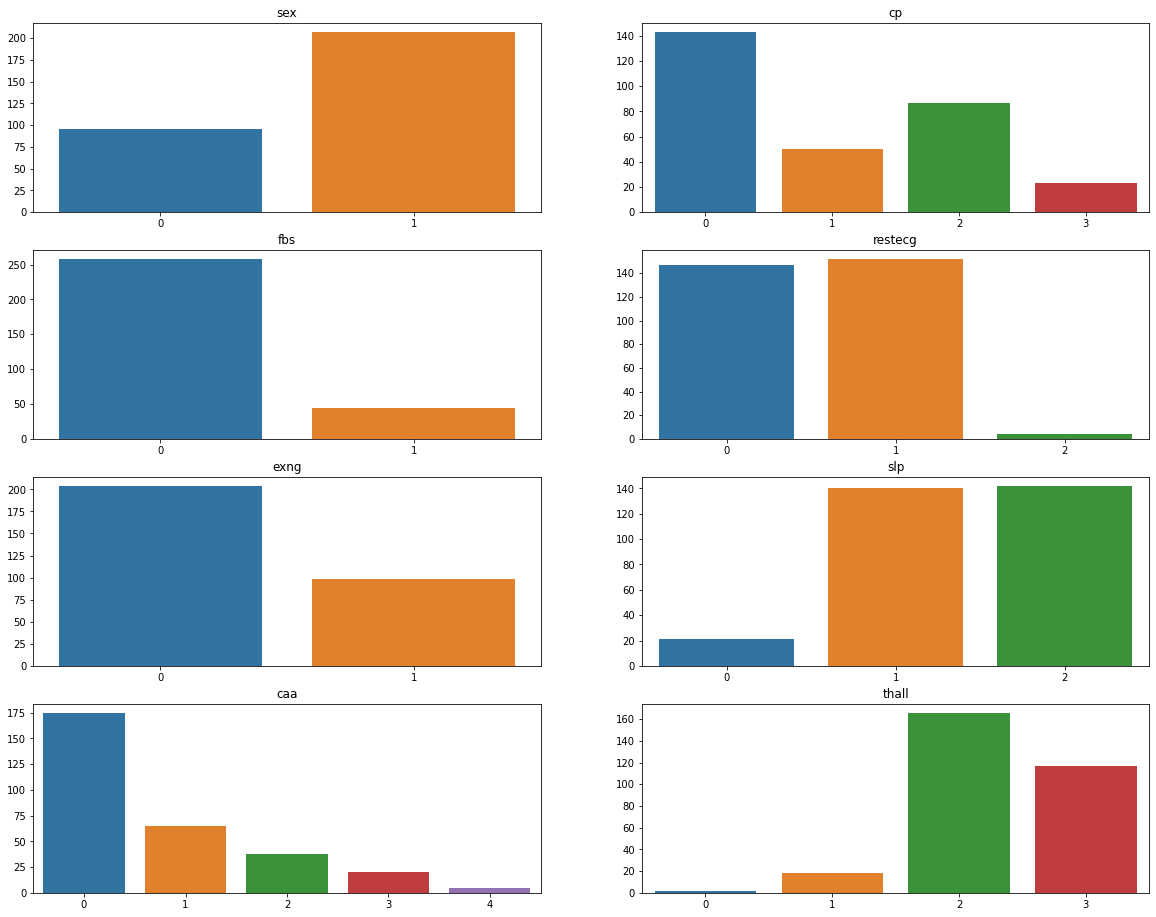

In [39]:
fig,  ax = plt.subplots(nrows=4, ncols=2, figsize=(20,16))
t = 0

for i in range(4):
    for j in range(2):
        cat_bar = [df[col].value_counts() for col in cat_cols]
        axes = ax[i][j]
        sns.barplot(x=cat_bar[t].index, y=cat_bar[t].values, ax=axes)
        axes.set_title(cat_cols[t])
        t += 1
plt.show()

In [43]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

-------
Let's see data info again - about categorical columns
* Sex : Sex of the patient
    * Value 0: Women
    * Value 1: Man
    
    
* exang: exercise induced angina 
    * Value 0: no (False)
    * Value 1: yes (True)
    
    
* ca: number of major vessels
    * Value 0: NOthing
    * Value 1: 1 vessel
    * Value 2: 2 vessel
    * Value 3: 3 vessel
    * Value 4: 4 vessel
    
    
* cp : Chest Pain type chest pain type 
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
    
    
* fbs : (fasting blood sugar > 120 mg/dl) 
    * Value 0: fasting blood sugar =< 120 (False)
    * Value 1: fasting blood sugar > 120 (True)
    
        
* rest_ecg : resting electrocardiographic results 
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria


* **target : 0= less chance of heart attack 1= more chance of heart attack

-----------
- We don't have information about ['slp','thall','caa']
- We have information below (around)
    * Sex : Man - 70%
    * cp : Typical angina - 50%
    * fbs : fasting blood sugar <= 120(low) 85%
    * rest_ecg : 'Value 0 and 1' are 90% (normal or ST-T wave abnormal)
    * exang(exercise induced angina) : 0(False) 70%
    

In [47]:
df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

In [48]:
output = df.output.value_counts()

<AxesSubplot:>

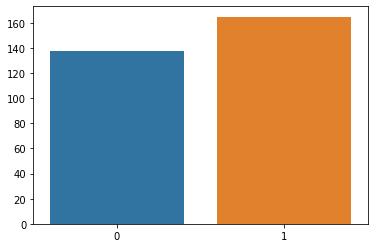

In [49]:
sns.barplot(x=output.index, y=output.values)

Well Classified 'Y(Output)'

# Step 3. Correlation Check

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


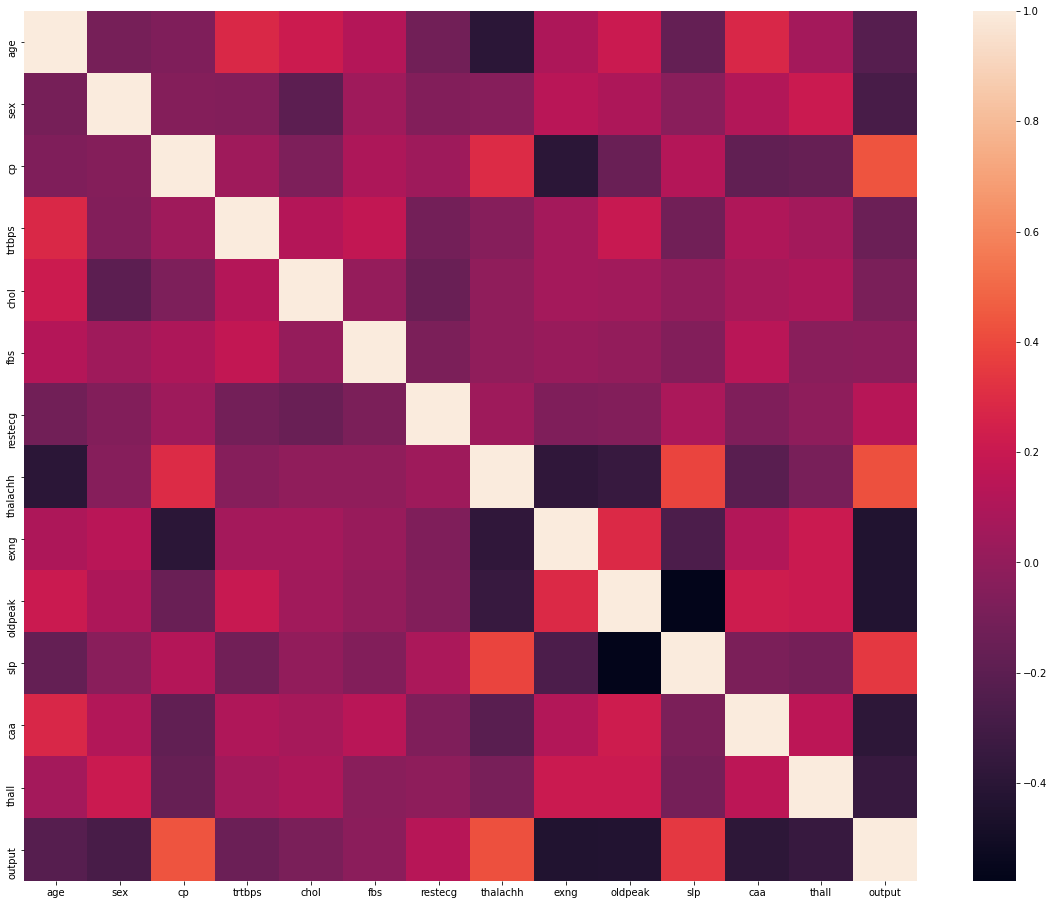

In [51]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,16))
sns.heatmap(df.corr())
plt.show()


In [52]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [53]:
df.corr()['output']

age        -0.225439
sex        -0.280937
cp          0.433798
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalachh    0.421741
exng       -0.436757
oldpeak    -0.430696
slp         0.345877
caa        -0.391724
thall      -0.344029
output      1.000000
Name: output, dtype: float64

In [54]:
df.corr()['output'].sort_values(ascending=False)

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

In [56]:
Output = pd.DataFrame(df.corr()['output'].sort_values(ascending=False))

<AxesSubplot:>

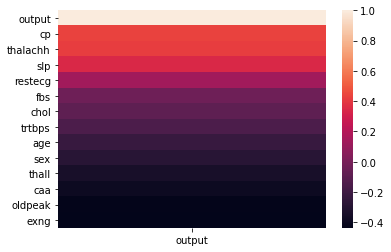

In [57]:
sns.heatmap(Output)

------------
**There are high relation - Output and ['cp','thalachh','slp','restecg']**

# Step 4. Test Data Split and Standard Scaling

In [58]:
from sklearn.model_selection import train_test_split

In [98]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [99]:
train = df.iloc[:,:-1]

In [100]:
test = df.iloc[:,-1:]

In [101]:
train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [102]:
test

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [124]:
X_train, X_test, y_train, y_test = train_test_split(train,test, test_size=0.3, random_state=32)

In [125]:
X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2


In [126]:
y_train

,output
193,0
266,0
244,0
117,1
2,1
...,...
71,1
252,0
88,1
43,1


In [127]:
X_test

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3


In [128]:
y_test

,output
91,1
297,0
19,1
153,1
60,1
...,...
237,0
156,1
123,1
227,0


In [129]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(212, 13) (91, 13)
(212, 1) (91, 1)


----------
Well split, rows=212, cols=(x:13, y:1)

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
scaler = StandardScaler()
X_train_raw = scaler.fit_transform(X_train)
X_test_raw = scaler.transform(X_test)

In [132]:
train.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

In [133]:
test.columns

Index(['output'], dtype='object')

In [134]:
X_test.shape

(91, 13)

In [135]:
X_train.shape

(212, 13)

In [136]:
X_train = pd.DataFrame(X_train_raw, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_raw, columns=X_test.columns, index=X_test.index)

In [137]:
X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
193,0.612761,0.702109,-0.923811,0.784743,0.682573,-0.390095,-1.010805,-0.338749,1.337712,1.574271,-0.712319,1.153074,1.117881
266,0.083399,-1.424279,-0.923811,2.782272,1.517949,-0.390095,2.850288,-1.440201,1.337712,2.104728,-0.712319,-0.720119,-0.483408
244,0.189272,0.702109,-0.923811,0.042804,-1.136688,-0.390095,-1.010805,-1.968899,1.337712,0.955405,-0.712319,0.216477,-2.084697
117,0.189272,0.702109,1.984821,-0.642063,-0.969613,-0.390095,-1.010805,0.542414,-0.747545,0.778587,-0.712319,-0.720119,1.117881
2,-1.398814,-1.424279,0.045733,-0.071340,-0.765410,-0.390095,-1.010805,0.982995,-0.747545,0.336540,0.984441,-0.720119,-0.483408
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.340090,0.702109,1.015277,-2.125941,-0.338441,-0.390095,0.919741,0.189949,1.337712,-0.901192,0.984441,0.216477,1.117881
252,0.824506,-1.424279,-0.923811,0.385238,0.905340,2.563480,0.919741,-1.924841,-0.747545,0.778587,-0.712319,2.089670,-0.483408
88,-0.022473,-1.424279,1.015277,-1.212785,-0.579771,-0.390095,0.919741,0.366181,-0.747545,0.513358,-0.712319,-0.720119,-0.483408
43,-0.128345,-1.424279,-0.923811,-0.071340,0.348423,-0.390095,-1.010805,-0.294691,-0.747545,-0.547555,-0.712319,-0.720119,-0.483408


In [139]:
y_train

,output
193,0
266,0
244,0
117,1
2,1
...,...
71,1
252,0
88,1
43,1


In [138]:
X_test

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
91,0.295144,0.702109,-0.923811,0.042804,-0.709719,-0.390095,0.919741,0.806762,1.337712,-0.901192,0.984441,-0.720119,1.117881
297,0.506889,0.702109,-0.923811,1.869116,-1.285199,2.563480,-1.010805,-2.629771,-0.747545,-0.017098,-0.712319,1.153074,-2.084697
19,1.565612,-1.424279,1.984821,0.499382,-0.115674,-0.390095,0.919741,0.057774,-0.747545,0.690177,0.984441,1.153074,-0.483408
153,1.247995,-1.424279,1.015277,0.841816,0.608318,-0.390095,-1.010805,0.101832,-0.747545,-0.901192,-0.712319,0.216477,-0.483408
60,1.777357,-1.424279,1.015277,-1.212785,0.366987,2.563480,-1.010805,-0.867446,-0.747545,-0.901192,0.984441,0.216477,-0.483408
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.612761,0.702109,-0.923811,0.499382,0.886776,-0.390095,-1.010805,0.894878,-0.747545,0.159721,-0.712319,1.153074,1.117881
156,-0.763579,0.702109,1.015277,-0.071340,0.144220,-0.390095,0.919741,1.291401,-0.747545,-0.901192,0.984441,-0.720119,-0.483408
123,-0.022473,-1.424279,1.015277,-1.326930,0.404115,-0.390095,-1.010805,0.762704,-0.747545,-0.901192,0.984441,-0.720119,-0.483408
227,-2.034048,0.702109,-0.923811,-0.642063,-0.876794,-0.390095,0.919741,-0.867446,1.337712,0.513358,-0.712319,-0.720119,1.117881


In [140]:
y_test

,output
91,1
297,0
19,1
153,1
60,1
...,...
237,0
156,1
123,1
227,0


-------------
OK, Well Scaled! Let's Build a Model

# Step 5. Modeling and Prediction

In [141]:
from sklearn.linear_model import LogisticRegression

In [142]:
lr = LogisticRegression()

In [150]:
lr.fit(X_train, y_train.values.ravel()) # ravel() : 1d - array transform
y_pred = lr.predict(X_test)


-----------------
!. Let's See more about ravel()

In [154]:
y_train.values.ravel()

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0])

In [155]:
y_train

,output
193,0
266,0
244,0
117,1
2,1
...,...
71,1
252,0
88,1
43,1


This difference make important warning!

In [158]:
(y_pred == y_test.values.ravel()).sum() / len(y_pred)

0.8571428571428571

This code is same like ..

In [161]:
from sklearn.metrics import accuracy_score

In [162]:
accuracy_score(y_pred, y_test)

0.8571428571428571